In [38]:
#importing all the relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
flight=pd.read_csv("flights.csv")

In [39]:
flight.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2020,1,1,4,EV,4160,N11150,JAX,EWR,540,...,743.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,1,4,AA,1635,N025AA,ATL,DFW,625,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,4,WN,119,N271LV,RSW,ATL,800,...,934.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,4,EV,4936,N738EV,MSP,IAD,900,...,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,4,DL,2319,N960DL,LGA,MSP,1010,...,1225.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
flight.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5816,2020,12,31,4,UA,436,N69838,IAD,TPA,1230,...,1448.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5817,2020,12,31,4,WN,2265,N626SW,TUL,LAS,1345,...,1523.0,38.0,0,0,NaN,0.0,0.0,8.0,30.0,0.0
5818,2020,12,31,4,MQ,3083,N513MQ,STL,ORD,1358,...,1525.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819,2020,12,31,4,EV,2775,N624AE,SPI,DFW,1411,...,1605.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5820,2020,12,31,4,WN,3479,N719SW,CMH,PHX,1450,...,1734.0,19.0,0,0,NaN,19.0,0.0,0.0,0.0,0.0


In [41]:
print("Total No. of observations : {}".format(len(flight)))

Total No. of observations : 5821


In [42]:
print("Total No. of features : {}".format(len(flight.columns)))

Total No. of features : 31


In [43]:
for col in flight.columns:
    print(col)

YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [45]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5821 non-null   int64  
 1   MONTH                5821 non-null   int64  
 2   DAY                  5821 non-null   int64  
 3   DAY_OF_WEEK          5821 non-null   int64  
 4   AIRLINE              5821 non-null   object 
 5   FLIGHT_NUMBER        5821 non-null   int64  
 6   TAIL_NUMBER          5805 non-null   object 
 7   ORIGIN_AIRPORT       5821 non-null   object 
 8   DESTINATION_AIRPORT  5821 non-null   object 
 9   SCHEDULED_DEPARTURE  5821 non-null   int64  
 10  DEPARTURE_TIME       5730 non-null   float64
 11  DEPARTURE_DELAY      5730 non-null   float64
 12  TAXI_OUT             5728 non-null   float64
 13  WHEELS_OFF           5728 non-null   float64
 14  SCHEDULED_TIME       5821 non-null   int64  
 15  ELAPSED_TIME         5713 non-null   f

In [46]:
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 91
The missing values in Arrival delays: 108


In [47]:
flight[(flight['ARRIVAL_DELAY'].isnull()) | (flight['DEPARTURE_DELAY'].isnull()) ][['ARRIVAL_DELAY','ARRIVAL_TIME','DEPARTURE_DELAY','DEPARTURE_TIME']].head(10)

,ARRIVAL_DELAY,ARRIVAL_TIME,DEPARTURE_DELAY,DEPARTURE_TIME
1,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN
350,NaN,NaN,31.0,1221.0
359,NaN,NaN,NaN,NaN


In [48]:
flight.dropna(subset=['DEPARTURE_DELAY','ARRIVAL_DELAY'],inplace=True)


In [49]:
len(flight)

5713

In [50]:
print("The missing values in departure delays: {}" .format(flight['DEPARTURE_DELAY'].isnull().sum()))
print("The missing values in Arrival delays: {}" .format(flight['ARRIVAL_DELAY'].isnull().sum()))

The missing values in departure delays: 0
The missing values in Arrival delays: 0


In [51]:
counter = 0
for index, row in flight.iterrows():
    print("Airline:", row['AIRLINE'], "\tFlight Number:", row['FLIGHT_NUMBER'], "\tArrival Delay:", row['ARRIVAL_DELAY'], "\tDeparture Delay:", row['DEPARTURE_DELAY'])
    counter += 1
    if counter >= 10:
        break


Airline: EV 	Flight Number: 4160 	Arrival Delay: -14.0 	Departure Delay: -9.0
Airline: WN 	Flight Number: 119 	Arrival Delay: -11.0 	Departure Delay: -6.0
Airline: EV 	Flight Number: 4936 	Arrival Delay: 12.0 	Departure Delay: 1.0
Airline: DL 	Flight Number: 2319 	Arrival Delay: -5.0 	Departure Delay: 0.0
Airline: DL 	Flight Number: 1806 	Arrival Delay: -20.0 	Departure Delay: -2.0
Airline: AA 	Flight Number: 1509 	Arrival Delay: -20.0 	Departure Delay: -9.0
Airline: OO 	Flight Number: 5354 	Arrival Delay: 36.0 	Departure Delay: 32.0
Airline: EV 	Flight Number: 5331 	Arrival Delay: -13.0 	Departure Delay: -5.0
Airline: UA 	Flight Number: 1062 	Arrival Delay: 23.0 	Departure Delay: 0.0
Airline: DL 	Flight Number: 1336 	Arrival Delay: -5.0 	Departure Delay: 0.0


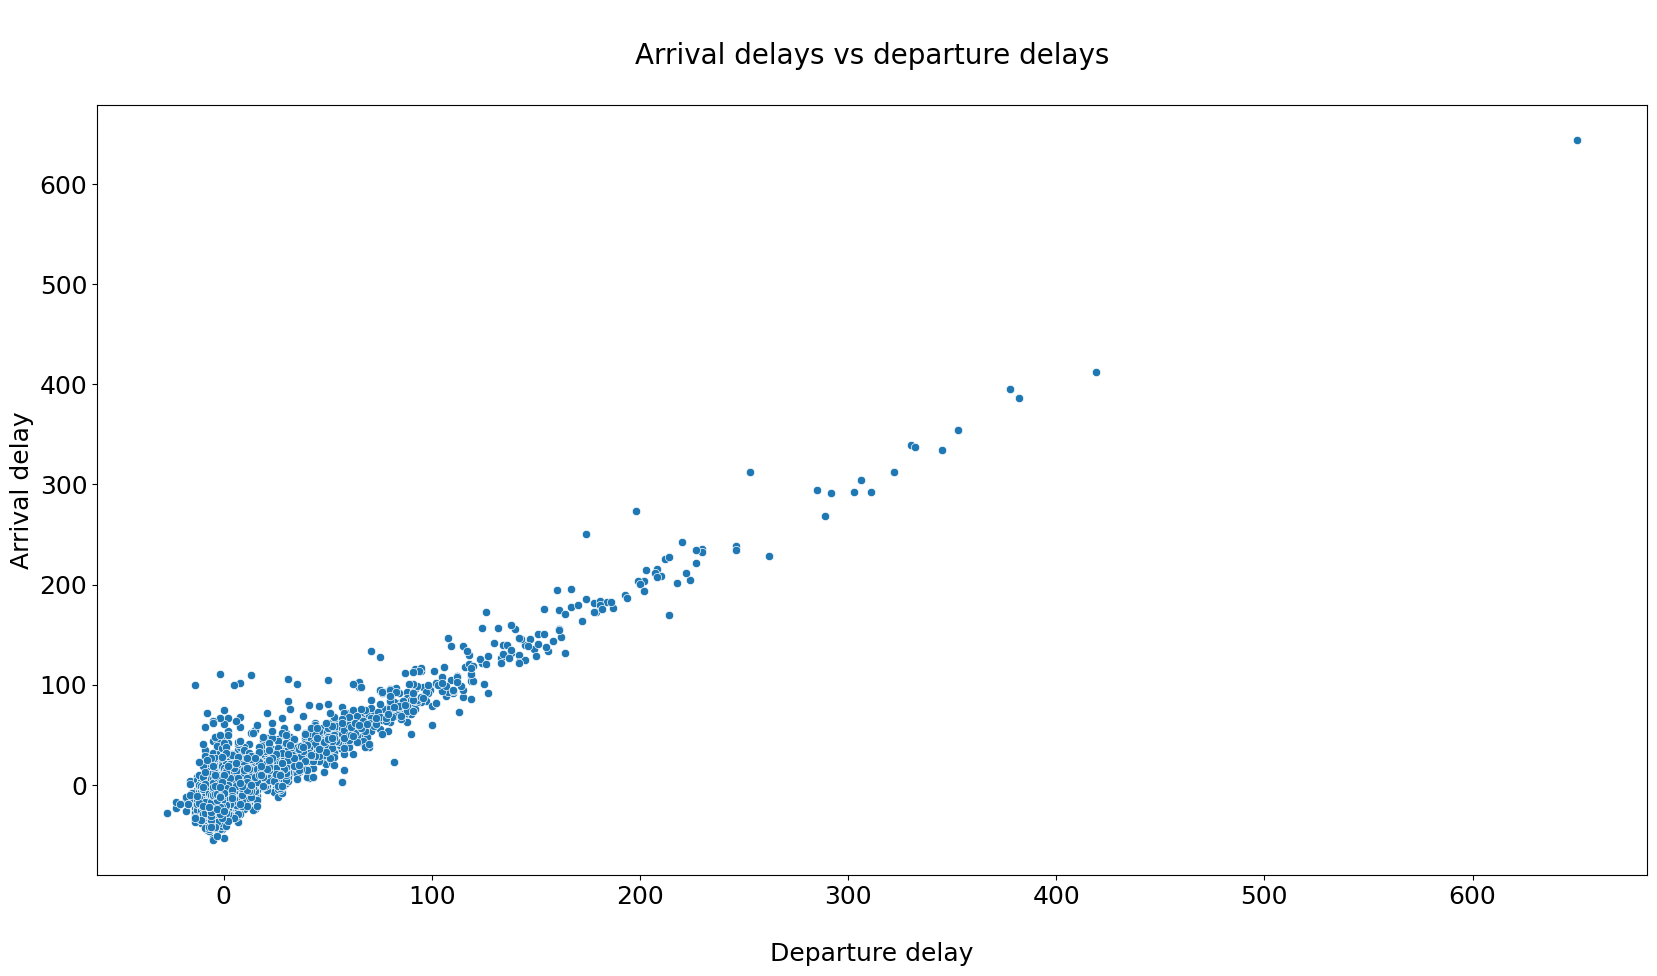

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="DEPARTURE_DELAY",y="ARRIVAL_DELAY",data=flight)
plt.xlabel("\nDeparture delay" ,fontsize=18)
plt.ylabel("Arrival delay" ,fontsize=18)
plt.title("\nArrival delays vs departure delays\n",fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

In [53]:
print("Average departure delay : {} " .format(flight['DEPARTURE_DELAY'].mean()))
print("Median departure delay : {} " .format(flight['DEPARTURE_DELAY'].median()))
print("Average arrival delay : {} " .format(flight['ARRIVAL_DELAY'].mean()))
print("Median arrival delay : {} " .format(flight['ARRIVAL_DELAY'].median()))

Average departure delay : 8.886574479257833 
Median departure delay : -2.0 
Average arrival delay : 3.9882723612812883 
Median arrival delay : -5.0 


In [54]:
print("The No. of airlines : {}".format(flight['AIRLINE'].nunique()))
print("The different airlines and their count : \n")
count_air=pd.DataFrame(flight['AIRLINE'].value_counts())
count_air=count_air.rename(columns={'AIRLINE':'COUNT'})
count_air

The No. of airlines : 14
The different airlines and their count : 



,COUNT
WN,1269
DL,918
AA,710
OO,575
EV,546
UA,506
MQ,269
B6,257
US,206
AS,145


In [55]:
flightmelt=flight[['AIRLINE','DEPARTURE_DELAY','ARRIVAL_DELAY']]
flightmelt=pd.melt(flightmelt,id_vars=['AIRLINE'],var_name=['ARRIVAL/DEPARTURE DELAY'],value_name='DELAY')
flightmelt.head()

,AIRLINE,ARRIVAL/DEPARTURE DELAY,DELAY
0,EV,DEPARTURE_DELAY,-9.0
1,WN,DEPARTURE_DELAY,-6.0
2,EV,DEPARTURE_DELAY,1.0
3,DL,DEPARTURE_DELAY,0.0
4,DL,DEPARTURE_DELAY,-2.0


<ipython-input-56-6c2c78d22764>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-50,100,10)


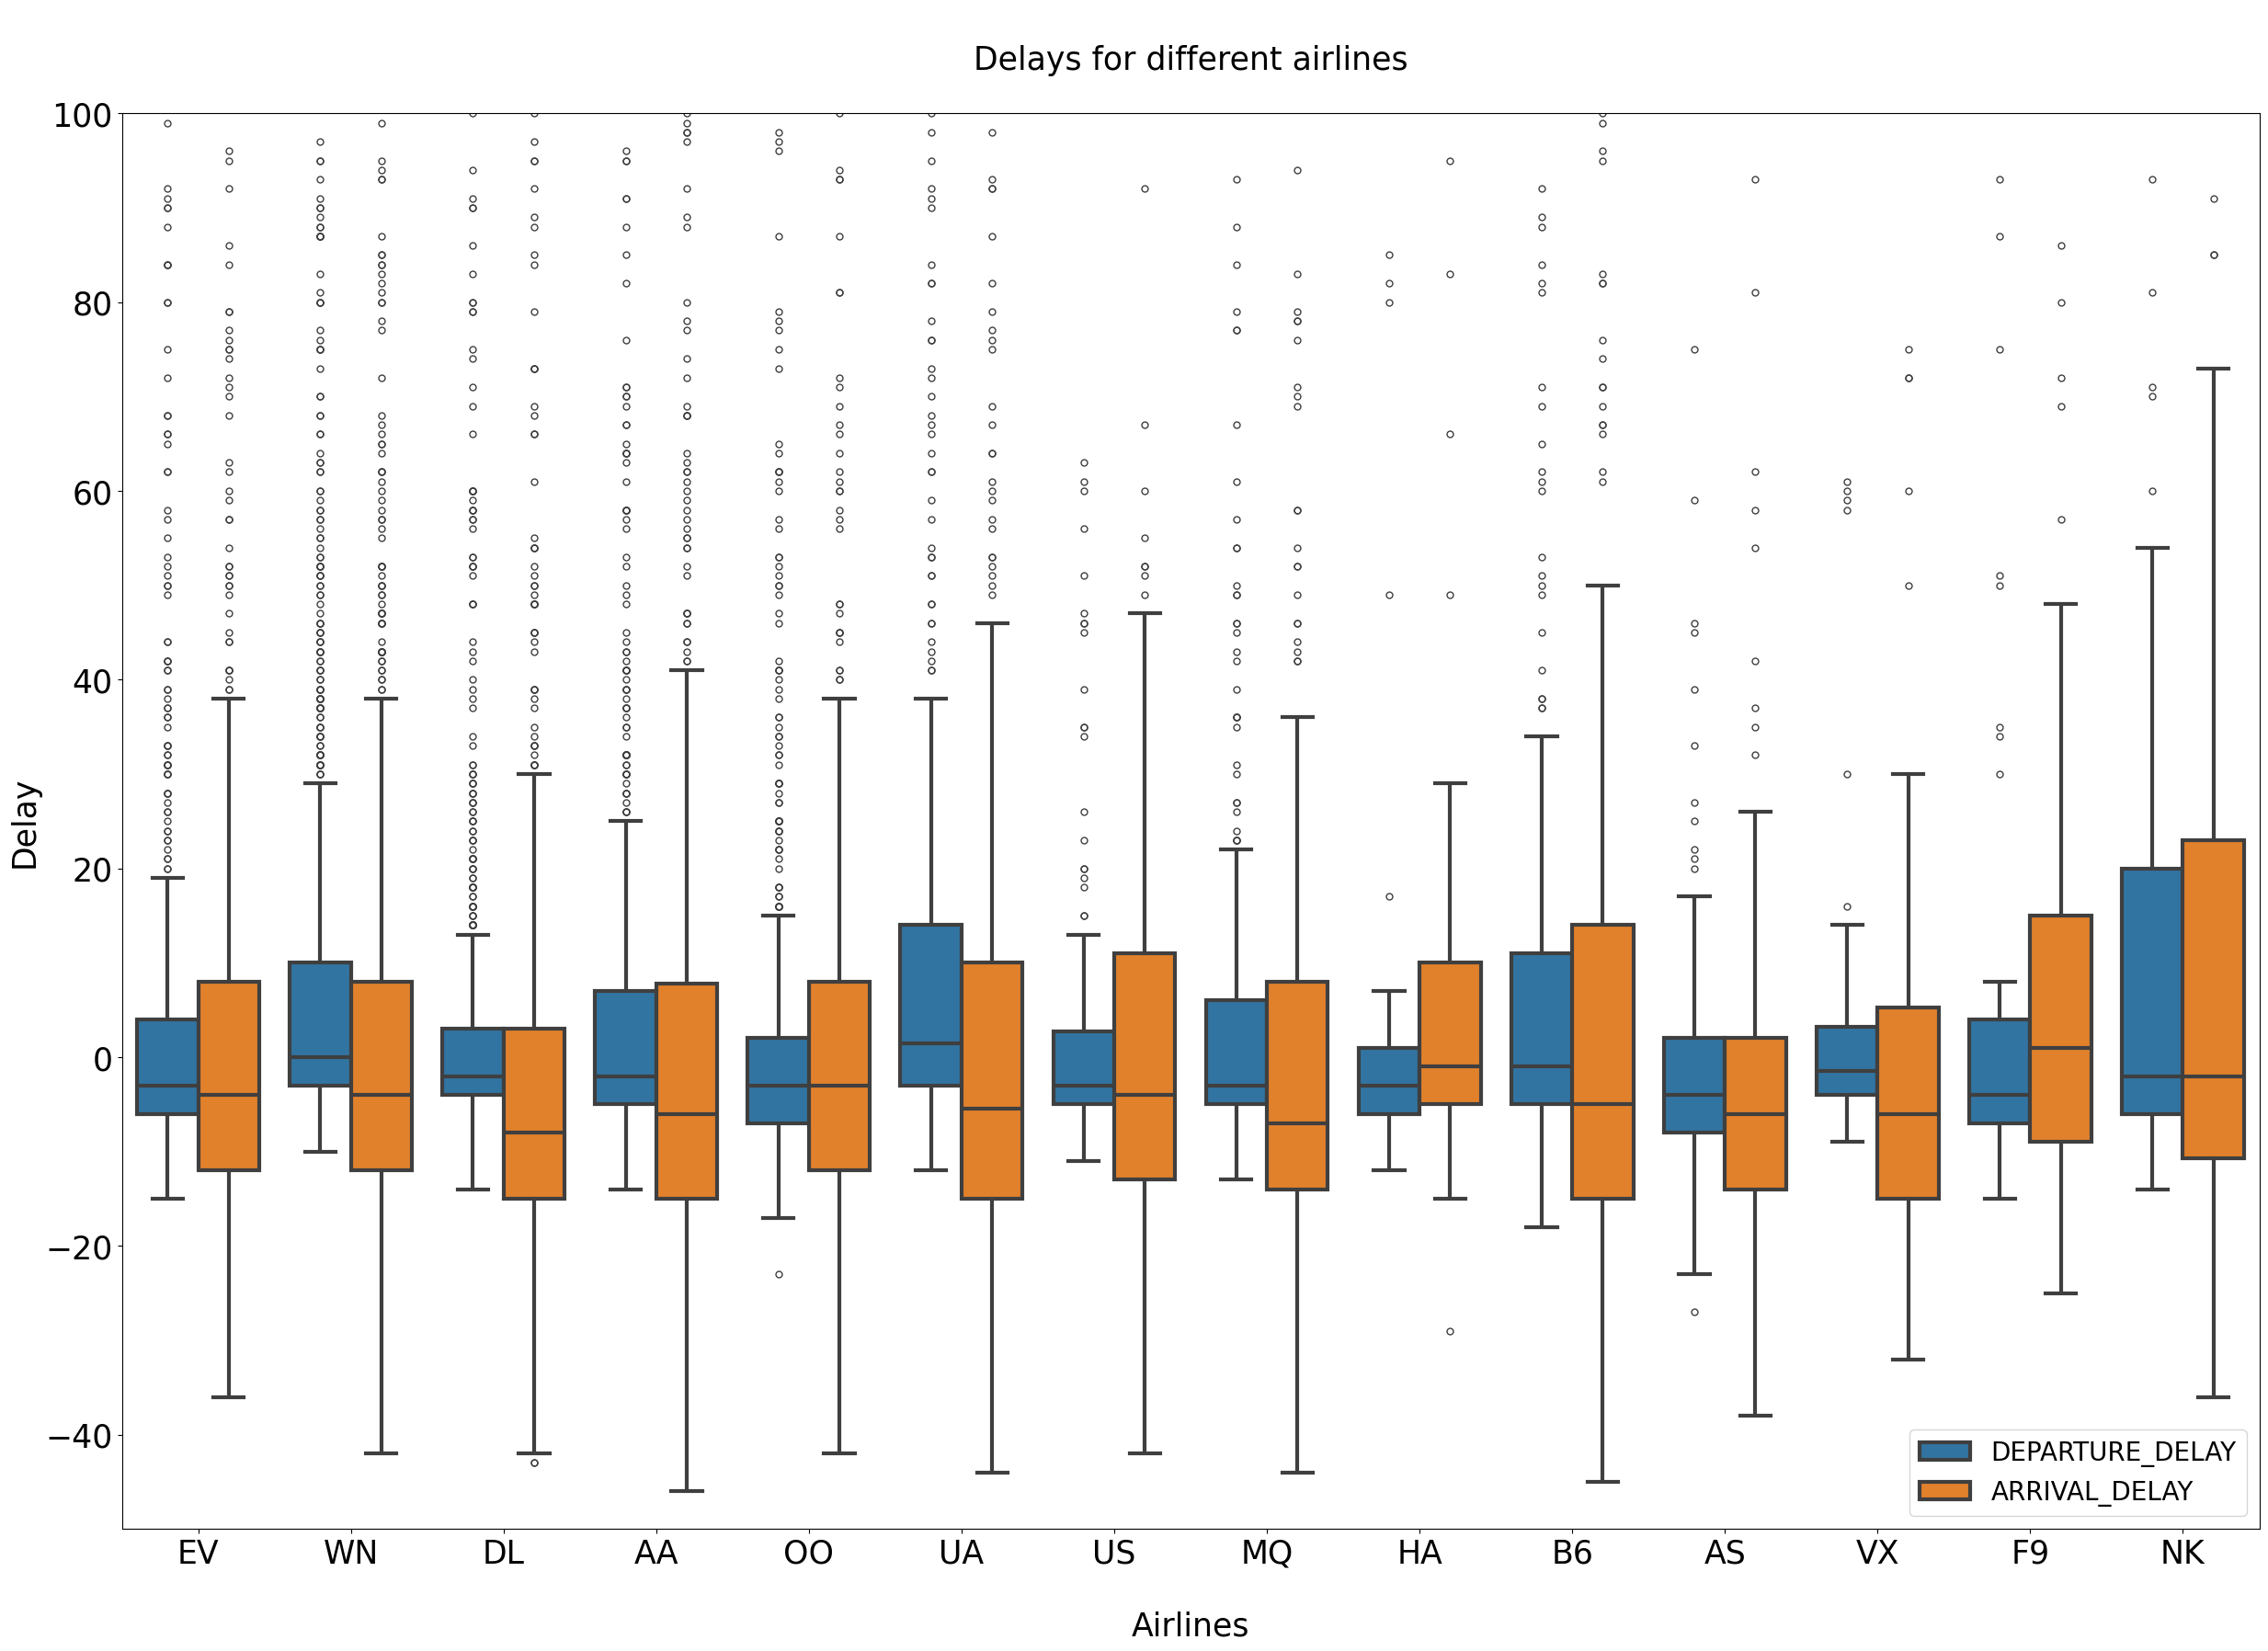

In [56]:
plt.figure(figsize=(30,20))
sns.boxplot(x=flightmelt['AIRLINE'],y=flightmelt['DELAY'],hue=flightmelt['ARRIVAL/DEPARTURE DELAY'],linewidth=3,fliersize=5)
plt.tick_params(labelsize=25)
plt.xlabel("\nAirlines" ,fontsize=25)
plt.ylabel("Delay" ,fontsize=25)
plt.legend(fontsize=20)
plt.ylim(-50,100,10)
plt.title("\nDelays for different airlines\n",fontsize=25)
plt.show()

In [57]:
depart_airline_5=flight.groupby('AIRLINE')['DEPARTURE_DELAY'].describe()
depart_airline_5=depart_airline_5[['mean','count','min','25%','50%','75%','max']]
depart_airline_5=depart_airline_5.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
depart_airline_5=depart_airline_5.sort_values(by='Median',ascending=False)
print("\nDEPARTURE DELAY SUMMARY BASED ON AIRLINES: ")
depart_airline_5


DEPARTURE DELAY SUMMARY BASED ON AIRLINES: 


,mean,count,Min,Q1,Median,Q3,Max
AIRLINE,,,,,,,
UA,13.851779,506.0,-12.0,-3.0,1.5,14.00,332.0
WN,9.894405,1269.0,-10.0,-3.0,0.0,10.00,224.0
B6,13.645914,257.0,-18.0,-5.0,-1.0,11.00,330.0
VX,8.593750,64.0,-9.0,-4.0,-1.5,3.25,230.0
AA,8.349296,710.0,-14.0,-5.0,-2.0,7.00,289.0
DL,7.238562,918.0,-14.0,-4.0,-2.0,3.00,419.0
NK,15.228814,118.0,-14.0,-6.0,-2.0,20.00,353.0
EV,7.461538,546.0,-15.0,-6.0,-3.0,4.00,382.0
HA,7.964912,57.0,-12.0,-6.0,-3.0,1.00,202.0


In [58]:
arr_airline_5=flight.groupby('AIRLINE')['ARRIVAL_DELAY'].describe()
arr_airline_5=arr_airline_5[['mean','count','min','25%','50%','75%','max']]
arr_airline_5=arr_airline_5.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
arr_airline_5=arr_airline_5.sort_values(by='Median',ascending=False)
print("\nARRIVAL DELAY SUMMARY BASED ON AIRLINE : ")
arr_airline_5


ARRIVAL DELAY SUMMARY BASED ON AIRLINE : 


,mean,count,Min,Q1,Median,Q3,Max
AIRLINE,,,,,,,
F9,19.150685,73.0,-25.0,-9.00,1.0,15.00,644.0
HA,10.894737,57.0,-29.0,-5.00,-1.0,10.00,194.0
NK,14.881356,118.0,-36.0,-10.75,-2.0,23.00,354.0
OO,4.269565,575.0,-42.0,-12.00,-3.0,8.00,304.0
EV,5.686813,546.0,-36.0,-12.00,-4.0,8.00,386.0
US,5.067961,206.0,-42.0,-13.00,-4.0,11.00,334.0
WN,3.422380,1269.0,-53.0,-12.00,-4.0,8.00,273.0
B6,9.653696,257.0,-45.0,-15.00,-5.0,14.00,339.0
UA,4.693676,506.0,-53.0,-15.00,-5.5,10.00,337.0


In [59]:
depart_airport=flight.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].describe()
depart_airport=depart_airport[['mean','count','min','25%','50%','75%','max']]
depart_airport=depart_airport.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
depart_airport=depart_airport.sort_values(by='mean',ascending=False)
depart_airport=depart_airport.head(10)
print("\nDEPARTURE DELAY SUMMARY GROUPEDBY AIRPORT : ")
depart_airport


DEPARTURE DELAY SUMMARY GROUPEDBY AIRPORT : 


,mean,count,Min,Q1,Median,Q3,Max
ORIGIN_AIRPORT,,,,,,,
FAR,161.000000,1.0,161.0,161.00,161.0,161.00,161.0
12898,119.000000,1.0,119.0,119.00,119.0,119.00,119.0
BMI,101.333333,3.0,-5.0,-3.50,-2.0,154.50,311.0
ERI,92.000000,1.0,92.0,92.00,92.0,92.00,92.0
MYR,88.000000,4.0,-6.0,-3.75,2.5,94.25,353.0
14576,88.000000,1.0,88.0,88.00,88.0,88.00,88.0
14696,88.000000,1.0,88.0,88.00,88.0,88.00,88.0
10157,87.500000,2.0,-3.0,42.25,87.5,132.75,178.0
12992,80.000000,1.0,80.0,80.00,80.0,80.00,80.0


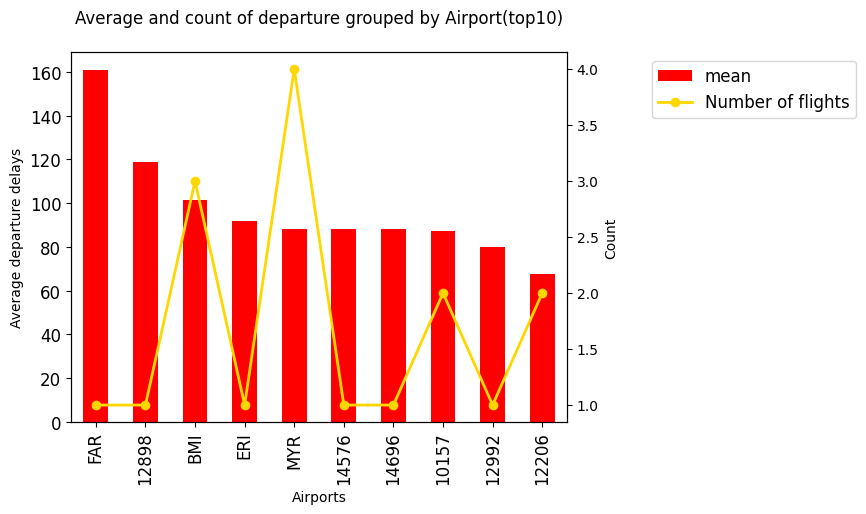

In [60]:
fig = plt.figure()
ax = depart_airport['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),depart_airport['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of flights")
ax.set_title("Average and count of departure grouped by Airport(top10)\n")
ax.set_xlabel("Airports")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

In [61]:
depart_dist=flight[['DEPARTURE_DELAY','DISTANCE']].sort_values(by=['DISTANCE','DEPARTURE_DELAY'],ascending=False)
depart_dist.head(15)

,DEPARTURE_DELAY,DISTANCE
2583,-7.0,4983
1529,-9.0,4983
3495,1.0,4817
1280,0.0,4817
1684,-3.0,4502
3511,23.0,3801
2820,19.0,3417
4522,5.0,3365
5762,8.0,3329
3969,25.0,3043


In [62]:
depart_delay_positive=flight[(flight['DEPARTURE_DELAY']>0) ]
depart_delay_positive['DEPARTURE_DELAY']

3        1.0
7       32.0
12      13.0
14      12.0
15       6.0
        ... 
5813    22.0
5814     4.0
5817    38.0
5818     8.0
5820     2.0
Name: DEPARTURE_DELAY, Length: 2115, dtype: float64

In [63]:
depart_dist.tail(15)

,DEPARTURE_DELAY,DISTANCE
609,-3.0,73
557,0.0,69
5234,2.0,68
3473,0.0,68
1432,-8.0,68
5190,78.0,67
187,24.0,67
3695,15.0,67
2190,0.0,67
678,-9.0,67


<ipython-input-64-16529884c101>:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,2000,500)
<ipython-input-64-16529884c101>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,200,50)


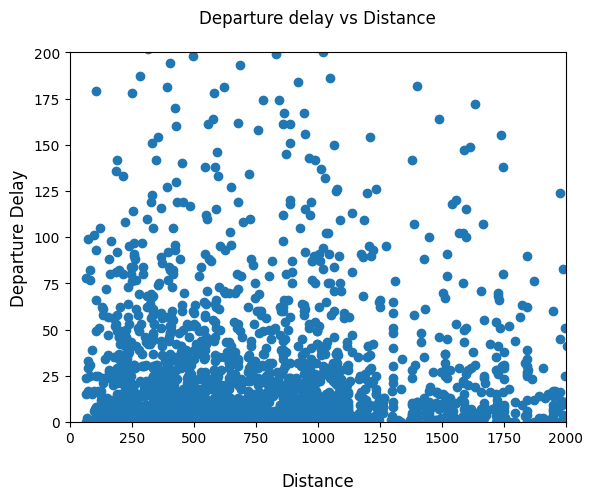

In [64]:
plt.scatter(x=flight['DISTANCE'],y=flight['DEPARTURE_DELAY'])
plt.xlim(0,2000,500)
plt.ylim(0,200,50)
plt.xlabel("\nDistance" ,fontsize=12)
plt.ylabel("Departure Delay" ,fontsize=12)
plt.title("Departure delay vs Distance\n")
plt.show()

<ipython-input-65-f7b8c1f5f16b>:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,2000,500)
<ipython-input-65-f7b8c1f5f16b>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,200,50)


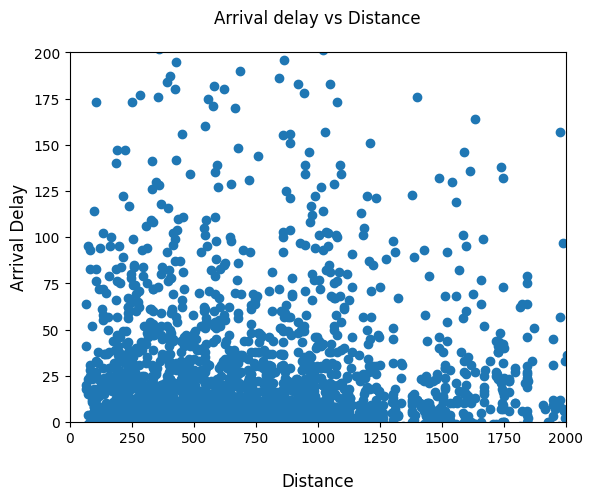

In [65]:
plt.scatter(x=flight['DISTANCE'],y=flight['ARRIVAL_DELAY'])
plt.xlim(0,2000,500)
plt.ylim(0,200,50)
plt.xlabel("\nDistance" ,fontsize=12)
plt.ylabel("Arrival Delay" ,fontsize=12)
plt.title("Arrival delay vs Distance\n")
plt.show()

In [66]:
flight[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].corr()

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
DEPARTURE_DELAY,1.000000,0.936069,0.023095
ARRIVAL_DELAY,0.936069,1.000000,-0.027935
DISTANCE,0.023095,-0.027935,1.000000


There is a significant amount of variability associated with arrival delay and distance as well as departure delay and distance. Distance doesn't seem like a good predictor of delay. There seems to very less correlation between departure delay and distance as well as arrival delay and distance

In [67]:
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
3495,1.0,-18.0,4817
3511,23.0,10.0,3801
2820,19.0,48.0,3417
4522,5.0,-13.0,3365
5762,8.0,-19.0,3329
3969,25.0,26.0,3043
5814,4.0,-13.0,2979
5530,13.0,-6.0,2845
728,1.0,-38.0,2717
2513,4.0,-23.0,2704


In [68]:
depart_delay_positive[['DEPARTURE_DELAY','ARRIVAL_DELAY','DISTANCE']].sort_values(by='DISTANCE',ascending=False).tail(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
81,25.0,31.0,83
1053,17.0,15.0,74
3442,33.0,23.0,74
503,99.0,95.0,73
2818,1.0,-3.0,73
4062,29.0,17.0,73
5234,2.0,-8.0,68
5190,78.0,64.0,67
187,24.0,20.0,67
3695,15.0,18.0,67


<ipython-input-69-b245f271cb55>:8: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,3000,500)
<ipython-input-69-b245f271cb55>:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,400,50)


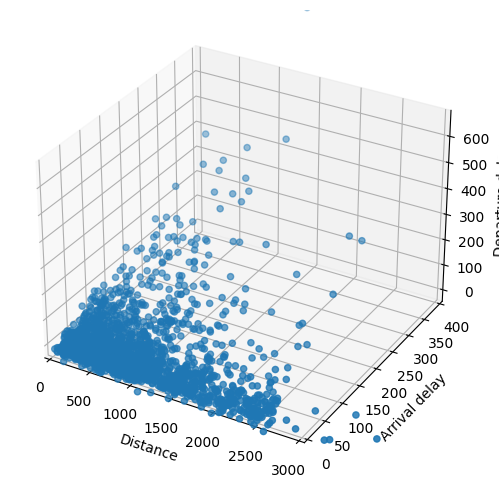

In [69]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(depart_delay_positive['DISTANCE'],depart_delay_positive['ARRIVAL_DELAY'],depart_delay_positive['DEPARTURE_DELAY'])
ax.set_xlabel('Distance')
ax.set_ylabel('Arrival delay')
ax.set_zlabel('Departure delay')
plt.xlim(0,3000,500)
plt.ylim(0,400,50)
plt.show()

Even though the distance is quite long, the distance doesn’t make up for the departure delay. This can be seen by the many arrival delays (positive values).


In [70]:
depart_dow=flight.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].describe()
depart_dow=depart_dow[['mean','count','min','25%','50%','75%','max']]
depart_dow=depart_dow.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nDEPARTURE DELAY SUMMARY GROUPED BY DAY OF WEEK : ")
depart_dow


DEPARTURE DELAY SUMMARY GROUPED BY DAY OF WEEK : 


,mean,count,Min,Q1,Median,Q3,Max
DAY_OF_WEEK,,,,,,,
1,9.786826,835.0,-17.0,-5.0,-2.0,8.0,382.0
2,8.995006,801.0,-18.0,-5.0,-2.0,6.0,330.0
3,7.488971,816.0,-16.0,-5.0,-2.0,6.0,345.0
4,9.390443,858.0,-18.0,-4.0,-1.0,8.0,419.0
5,9.661148,906.0,-16.0,-4.0,-1.0,8.0,311.0
6,7.125894,699.0,-27.0,-5.0,-2.0,5.0,353.0
7,9.385965,798.0,-23.0,-5.0,-1.0,9.0,650.0


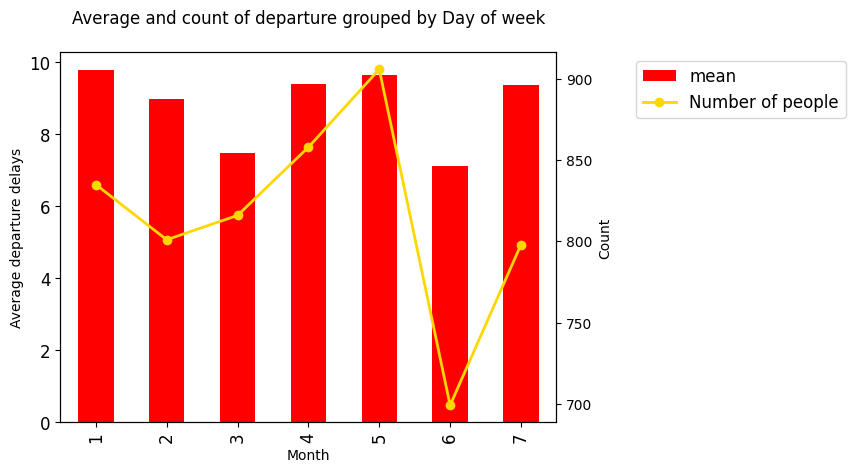

In [71]:
fig = plt.figure()
ax = depart_dow['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),depart_dow['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by Day of week\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

According to the above table and graph , the best day of the week to travel to experience least departure delay is Saturday-6 with a mean of 7.12. The highest departure delay is on Monday-1 with a mean of 9.7.

In [72]:
arr_dow=flight.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].describe()
arr_dow=arr_dow[['mean','count','min','25%','50%','75%','max']]
arr_dow=arr_dow.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nARRIVAL DELAY SUMMARY GROUPED BY DAY OF WEEK : ")
arr_dow


ARRIVAL DELAY SUMMARY GROUPED BY DAY OF WEEK : 


,mean,count,Min,Q1,Median,Q3,Max
DAY_OF_WEEK,,,,,,,
1,5.104192,835.0,-44.0,-13.00,-5.0,7.0,386.0
2,3.863920,801.0,-43.0,-14.00,-6.0,8.0,339.0
3,2.458333,816.0,-55.0,-14.00,-6.0,8.0,334.0
4,5.627040,858.0,-42.0,-12.00,-4.5,10.0,412.0
5,4.716336,906.0,-45.0,-13.00,-5.0,9.0,304.0
6,1.133047,699.0,-53.0,-15.00,-6.0,4.0,354.0
7,4.422306,798.0,-53.0,-13.75,-5.0,9.0,644.0


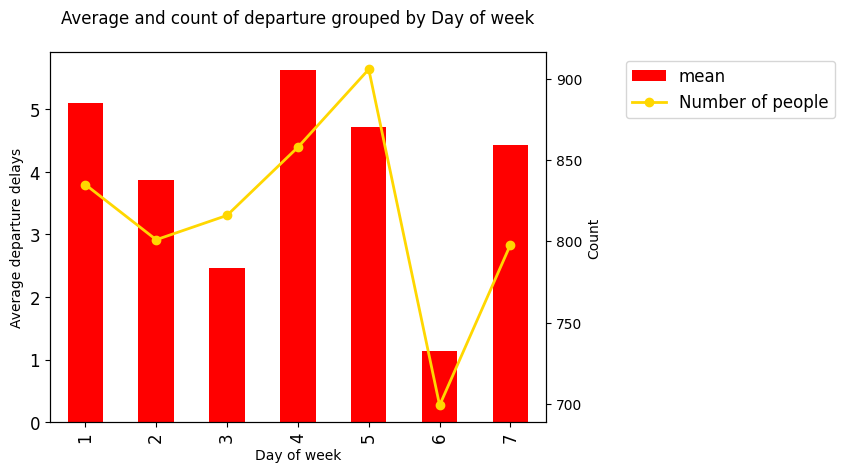

In [73]:
fig = plt.figure()
ax = arr_dow['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),depart_dow['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by Day of week\n")
ax.set_xlabel("Day of week")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

In [74]:
delay_type=pd.DataFrame(flight['AIR_SYSTEM_DELAY'].describe())
delay_type['SECURITY_DELAY']=pd.DataFrame(flight['SECURITY_DELAY'].describe())
delay_type['AIRLINE_DELAY']=pd.DataFrame(flight['AIRLINE_DELAY'].describe())
delay_type['LATE_AIRCRAFT_DELAY']=pd.DataFrame(flight['LATE_AIRCRAFT_DELAY'].describe())
delay_type['WEATHER_DELAY']=pd.DataFrame(flight['WEATHER_DELAY'].describe())
delay_type=pd.DataFrame(delay_type.iloc[1])
delay_type

,mean
AIR_SYSTEM_DELAY,14.319963
SECURITY_DELAY,0.113806
AIRLINE_DELAY,18.119403
LATE_AIRCRAFT_DELAY,20.514925
WEATHER_DELAY,3.616604


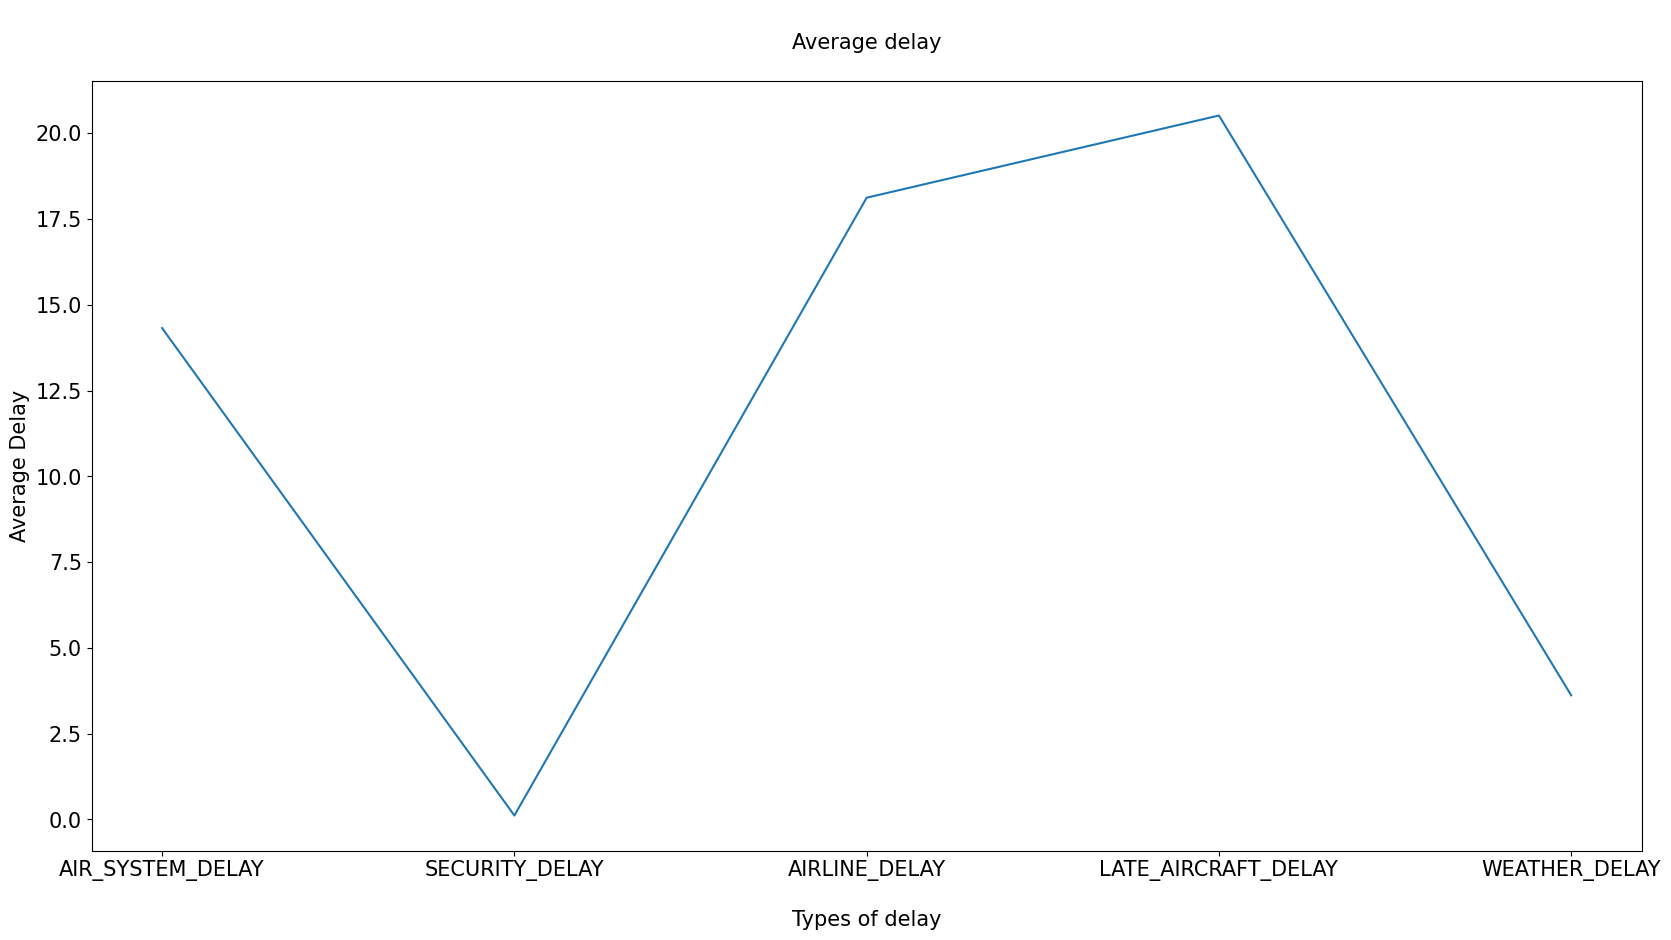

In [75]:
plt.figure(figsize=(20,10))
plt.plot(delay_type)
plt.tick_params(labelsize=15)
plt.xlabel("\nTypes of delay" ,fontsize=15)
plt.ylabel("Average Delay" ,fontsize=15)
plt.title("\nAverage delay\n",fontsize=15)
plt.show()

In [76]:
arr_mon=flight.groupby('MONTH')['ARRIVAL_DELAY'].describe()
arr_mon=arr_mon[['mean','count','min','25%','50%','75%','max']]
arr_mon=arr_mon.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nARRIVAL DELAY SUMMARY GROUPED BY MONTH : ")
arr_mon


ARRIVAL DELAY SUMMARY GROUPED BY MONTH : 


,mean,count,Min,Q1,Median,Q3,Max
MONTH,,,,,,,
1,2.663438,413.0,-40.0,-13.0,-5.0,7.0,395.0
2,5.921717,396.0,-42.0,-13.0,-4.0,9.0,292.0
3,7.189555,517.0,-53.0,-13.0,-4.0,11.0,412.0
4,2.601578,507.0,-45.0,-13.0,-6.0,7.0,334.0
5,5.843612,454.0,-36.0,-13.0,-4.0,10.0,226.0
6,8.571695,537.0,-55.0,-12.0,-3.0,12.0,312.0
7,7.605159,504.0,-36.0,-12.0,-3.0,13.0,644.0
8,6.121951,492.0,-44.0,-12.0,-4.0,8.0,354.0
9,-2.253165,474.0,-46.0,-16.0,-8.0,1.0,268.0


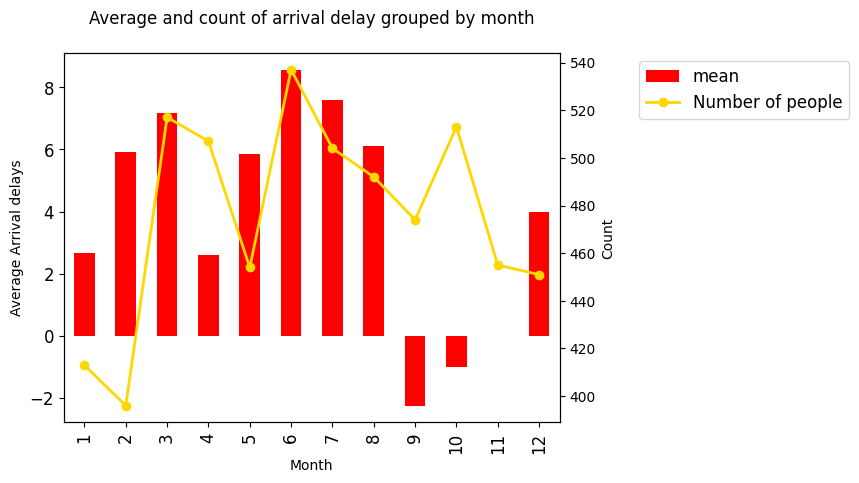

In [77]:
fig = plt.figure()
ax = arr_mon['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),arr_mon['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of arrival delay grouped by month\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average Arrival delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

In [78]:
depart_mon=flight.groupby('MONTH')['DEPARTURE_DELAY'].describe()
depart_mon=depart_mon[['mean','count','min','25%','50%','75%','max']]
depart_mon=depart_mon.rename(columns={'min':'Min','25%':'Q1','50%':'Median','75%':'Q3','max':'Max'})
print("\nDEPARTURE DELAY SUMMARY GROUPED BY MONTH : ")
depart_mon


DEPARTURE DELAY SUMMARY GROUPED BY MONTH : 


,mean,count,Min,Q1,Median,Q3,Max
MONTH,,,,,,,
1,7.532688,413.0,-18.0,-5.00,-1.0,8.00,378.0
2,9.603535,396.0,-15.0,-5.00,-1.0,8.00,303.0
3,12.353965,517.0,-16.0,-4.00,-1.0,12.00,419.0
4,7.252465,507.0,-23.0,-5.00,-2.0,7.00,345.0
5,10.544053,454.0,-15.0,-5.00,-1.0,9.75,212.0
6,11.832402,537.0,-14.0,-4.00,-1.0,10.00,322.0
7,12.644841,504.0,-18.0,-4.00,0.0,13.00,650.0
8,10.008130,492.0,-18.0,-4.25,-1.0,7.00,353.0
9,4.854430,474.0,-23.0,-6.00,-3.0,1.00,289.0


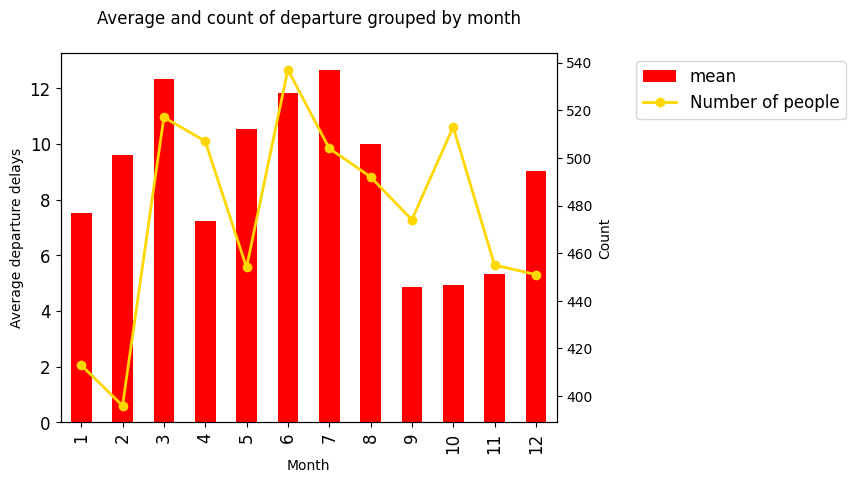

In [79]:
fig = plt.figure()
ax = depart_mon['mean'].plot(kind='bar', use_index=True,color='Red',fontsize=12,legend=False)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),arr_mon['count'].values, linestyle='-', marker='o', linewidth=2.0,color='gold',label="Number of people")
ax.set_title("Average and count of departure grouped by month\n")
ax.set_xlabel("Month")
ax.set_ylabel("Average departure delays")
ax2.set_ylabel("Count")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="best",bbox_to_anchor=(1.6, 1),fontsize=12)
plt.show()

In [80]:
flight.dropna(subset=["WEATHER_DELAY"],how="all",inplace=True)

In [81]:
flight.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            0
ELAPSED_TIME              0
AIR_TIME                  0
DISTANCE                  0
WHEELS_ON                 0
TAXI_IN                   0
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME              0
ARRIVAL_DELAY             0
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    1072
AIR_SYSTEM_DELAY          0
SECURITY_DELAY            0
AIRLINE_DELAY             0
LATE_AIRCRAFT_DELAY       0
WEATHER_DELAY             0
dtype: int64

In [82]:
Airline_dummy=pd.get_dummies(flight['AIRLINE'],prefix='Airline')
del Airline_dummy['Airline_AA']
dayweek_dummy=pd.get_dummies(flight['DAY_OF_WEEK'],prefix='Dayofweek')
del dayweek_dummy['Dayofweek_1']
flight=pd.concat([flight,Airline_dummy,dayweek_dummy],axis=1) # Converting categorical data to numerical data
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,Airline_UA,Airline_US,Airline_VX,Airline_WN,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5,Dayofweek_6,Dayofweek_7
7,2020,1,1,4,OO,5354,N472CA,ORD,MBS,1317,...,0,0,0,0,0,0,1,0,0,0
9,2020,1,1,4,UA,1062,N73291,DCA,DEN,1603,...,1,0,0,0,0,0,1,0,0,0
19,2020,1,2,5,US,2065,N534UW,CLT,IAH,1120,...,0,1,0,0,0,0,0,1,0,0
21,2020,1,2,5,OO,5211,N943SW,IDA,DEN,1338,...,0,0,0,0,0,0,0,1,0,0
22,2020,1,2,5,HA,335,N477HA,OGG,HNL,1503,...,0,0,0,0,0,0,0,1,0,0


In [83]:
X_cat_1=flight.iloc[:,31:]
X_num_1=flight[['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','DEPARTURE_TIME','DEPARTURE_DELAY','DISTANCE']]
X_1=pd.concat([X_num_1,X_cat_1],axis=1) # Concatenating the categorical and numerical data
X_1.head()

,LATE_AIRCRAFT_DELAY,AIRLINE_DELAY,AIR_SYSTEM_DELAY,WEATHER_DELAY,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,Airline_AS,Airline_B6,Airline_DL,...,Airline_UA,Airline_US,Airline_VX,Airline_WN,Dayofweek_2,Dayofweek_3,Dayofweek_4,Dayofweek_5,Dayofweek_6,Dayofweek_7
7,21.0,11.0,4.0,0.0,1349.0,32.0,222,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0.0,0.0,23.0,0.0,1603.0,0.0,1476,0,0,0,...,1,0,0,0,0,0,1,0,0,0
19,0.0,8.0,13.0,0.0,1128.0,8.0,912,0,0,0,...,0,1,0,0,0,0,0,1,0,0
21,50.0,0.0,31.0,0.0,1428.0,50.0,458,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22,89.0,25.0,0.0,0.0,1644.0,101.0,100,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
y_1=flight['ARRIVAL_DELAY']

In [85]:
X_con_1=sm.add_constant(X_1)
arr_del_stats_1=sm.OLS(y_1,X_con_1).fit()
arr_del_stats_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.273e+04
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:12:09   Log-Likelihood:                -2140.7
No. Observations:                1072   AIC:                             4335.
Df Residuals:                    1045   BIC:                             4470.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5743      0.300      1.916      0.056      -0.014       1.163
LATE_AIRCRAFT_DELAY     0.9814      0.004    251.351      0.000       0.974       0.989
AIRLINE_DELAY           0.9820      0.004    258.523      0.000       0.975       0.989
AIR_SYSTEM_DELAY        0.9853      0.003    311.685      0.000       0.979       0.992
WEATHER_DELAY           0.9846      0.004    239.180      0.000       0.977       0.993
DEPARTURE_TIME         -0.0001      0.000     -0.923      0.356      -0.000       0.000
DEPARTURE_DELAY         0.0158      0.003      4.647      0.000       0.009       0.023
DISTANCE                0.0001      0.000      1.106      0.269   -8.74e-05       0.000
Airline_AS              1.8908      0.434      4.354      0.000       1.039       2.743
Airline_B6              0.0009      0.277      0.003      0.997      -0.542       0.544
Airline_DL             -0.2385      0.224     -1.062      0.288      -0.679       0.202
Airline_EV             -0.1519      0.241     -0.629      0.529      -0.625       0.322
Airline_F9              0.0010      0.445      0.002      0.998      -0.872       0.874
Airline_HA             -0.1183      0.548     -0.216      0.829      -1.194       0.957
Airline_MQ             -0.1080      0.295     -0.366      0.715      -0.687       0.471
Airline_NK              0.4677      0.333      1.404      0.161      -0.186       1.122
Airline_OO             -0.1077      0.241     -0.448      0.654      -0.580       0.364
Airline_UA             -0.3509      0.233     -1.505      0.133      -0.808       0.107
Airline_US             -0.1699      0.319     -0.533      0.594      -0.796       0.456
Airline_VX             -0.1395      0.546     -0.256      0.798      -1.210       0.931
Airline_WN             -0.1731      0.199     -0.870      0.384      -0.563       0.217
Dayofweek_2            -0.2517      0.207     -1.214      0.225      -0.659       0.155
Dayofweek_3             0.0896      0.208      0.431      0.667      -0.319       0.498
Dayofweek_4            -0.2768      0.197     -1.404      0.161      -0.664       0.110
Dayofweek_5            -0.2329      0.198     -1.175      0.240      -0.622       0.156
Dayofweek_6            -0.2907      0.238     -1.222      0.222      -0.757       0.176
Dayofweek_7            -0.1769      0.206     -0.859      0.390      -0.581       0.227
==============================================================================
Omnibus:                     2216.606   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4284200.685
Skew:                          16.511   Prob(JB):                         0.00
Kurtosis:                     310.936   Cond. No.                     2.21e+04
================================================

In [86]:
arr_del_stats_1p=pd.DataFrame(arr_del_stats_1.params)
arr_del_stats_1p.columns=['Coef']
arr_del_stats_1p['p-values']=arr_del_stats_1.pvalues
arr_del_stats_1p

,Coef,p-values
const,0.574268,0.055692
LATE_AIRCRAFT_DELAY,0.981362,0.000000
AIRLINE_DELAY,0.982036,0.000000
AIR_SYSTEM_DELAY,0.985325,0.000000
WEATHER_DELAY,0.984608,0.000000
DEPARTURE_TIME,-0.000107,0.356129
DEPARTURE_DELAY,0.015849,0.000004
DISTANCE,0.000113,0.269123
Airline_AS,1.890803,0.000015
Airline_B6,0.000871,0.997490


In [87]:
print("\nR-squared: {}% ".format(arr_del_stats_1.rsquared*100))


R-squared: 99.90602987866627% 


In [88]:
y_hat_1=arr_del_stats_1.fittedvalues
y_minus_yhat_1=arr_del_stats_1.resid


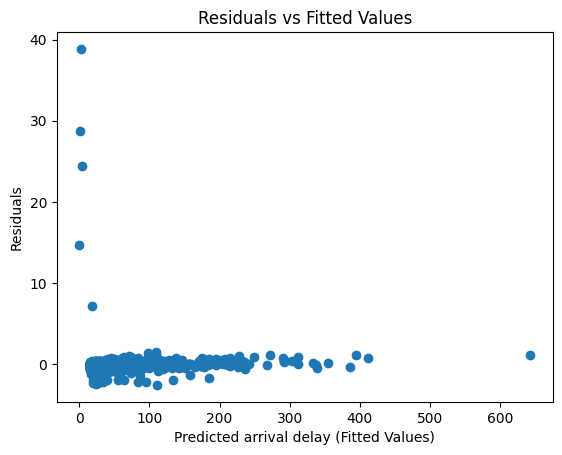

In [89]:
plt.scatter(y_hat_1,y_minus_yhat_1)
plt.xlabel('Predicted arrival delay (Fitted Values)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

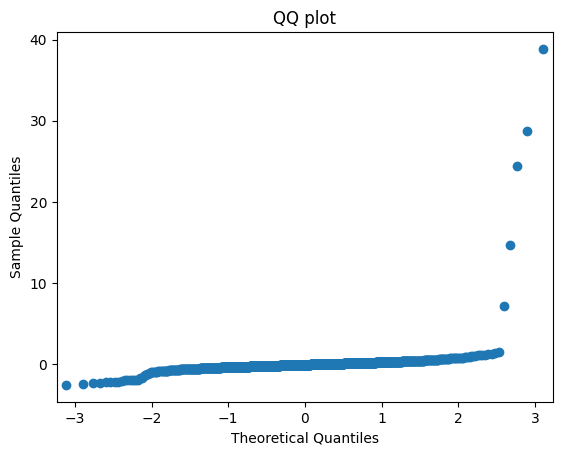

In [90]:
qq = sm.qqplot(arr_del_stats_1.resid)
plt.title("QQ plot")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3cc9465780>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3cc9465cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3cc94654e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3cc9466200>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3cc9641870>],
 'means': []}

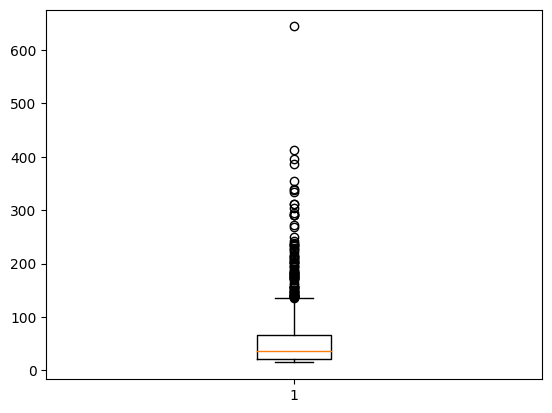

In [91]:
plt.boxplot(flight['ARRIVAL_DELAY'])

In [92]:
Q1= flight['ARRIVAL_DELAY'].quantile(0.25)
Q3=flight['ARRIVAL_DELAY'].quantile(0.75)
IQR=Q3-Q1

In [93]:
IQR

45.25

In [94]:
len(flight)

1072

In [95]:
flight.drop(flight[ (flight['ARRIVAL_DELAY']>Q3+1.5*IQR) | (flight['ARRIVAL_DELAY']<Q1-1.5*IQR)].index,inplace=True)

In [96]:
len(flight)

986

In [97]:
flight['log(y)'] = np.log(flight['ARRIVAL_DELAY'] +0.00001 )

In [98]:
X_2=flight[['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','DEPARTURE_DELAY']]
y_2=flight['log(y)']

In [99]:
X_con_2=sm.add_constant(X_2)
arr_del_stats_2=sm.OLS(y_2,X_con_2).fit()
arr_del_stats_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(y)   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     2161.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:12:55   Log-Likelihood:                 343.09
No. Observations:                 986   AIC:                            -674.2
Df Residuals:                     980   BIC:                            -644.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7076      0.010    268.092      0.000       2.688       2.727
LATE_AIRCRAFT_DELAY     0.0191      0.000     40.192      0.000       0.018       0.020
AIRLINE_DELAY           0.0193      0.000     39.368      0.000       0.018       0.020
AIR_SYSTEM_DELAY        0.0203      0.000     58.918      0.000       0.020       0.021
WEATHER_DELAY           0.0195      0.001     28.038      0.000       0.018       0.021
DEPARTURE_DELAY         0.0009      0.000      2.234      0.026       0.000       0.002
==============================================================================
Omnibus:                       36.792   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.677
Skew:                          -0.367   Prob(JB):                     1.63e-11
Kurtosis:                       3.819   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
arr_del_stats_2p=pd.DataFrame(arr_del_stats_2.params)
arr_del_stats_2p.columns=['Coef']
arr_del_stats_2p['p-values']=arr_del_stats_2.pvalues
arr_del_stats_2p

,Coef,p-values
const,2.707571,0.000000e+00
LATE_AIRCRAFT_DELAY,0.019111,1.781589e-209
AIRLINE_DELAY,0.019317,4.990089e-204
AIR_SYSTEM_DELAY,0.020272,0.000000e+00
WEATHER_DELAY,0.019478,1.745813e-127
DEPARTURE_DELAY,0.000854,2.570335e-02


In [101]:
print("\nR-squared: {}% ".format(arr_del_stats_2.rsquared*100))


R-squared: 91.68525991830104% 


In [102]:
print("Balance_Hat = {a} + {b}*LATE_AIRCRAFT_DELAY +{c} * AIRLINE_DELAY+ {d}*AIR_SYSTEM_DELAY+ {e}*WEATHER_DELAY +{f}*DEPARTURE_DELAY  "
      .format(a=arr_del_stats_2.params[0],b=arr_del_stats_2.params[1], c=arr_del_stats_2.params[2], d=arr_del_stats_2.params[3], e=arr_del_stats_2.params[4], f=arr_del_stats_2.params[5]))

Balance_Hat = 2.7075712834347883 + 0.01911116233240272*LATE_AIRCRAFT_DELAY +0.01931738551132117 * AIRLINE_DELAY+ 0.020272263585622844*AIR_SYSTEM_DELAY+ 0.01947810875204984*WEATHER_DELAY +0.0008544833163888549*DEPARTURE_DELAY  


In [103]:
y_hat_2=arr_del_stats_2.fittedvalues
y_minus_yhat_2=arr_del_stats_2.resid

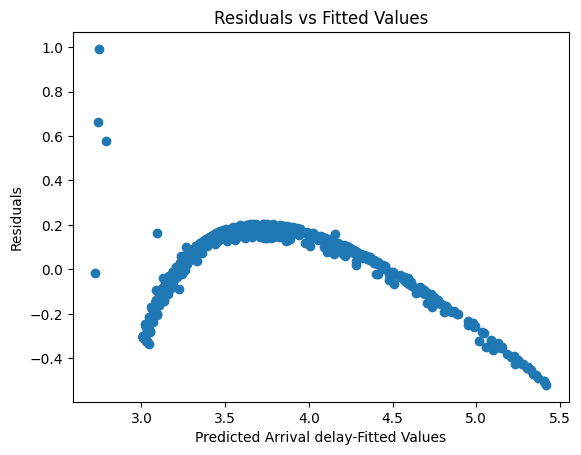

In [104]:
plt.scatter(y_hat_2,y_minus_yhat_2)
plt.xlabel('Predicted Arrival delay-Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

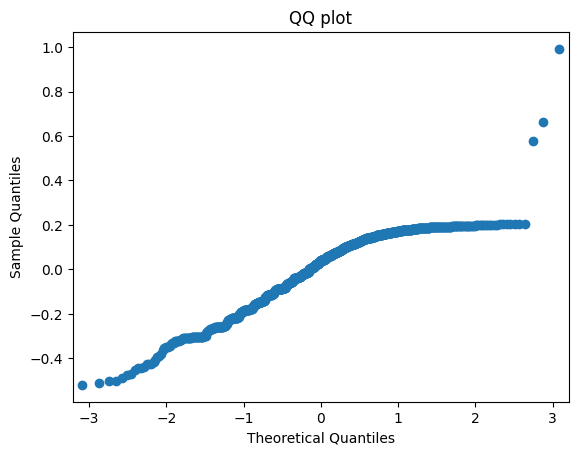

In [105]:
qq = sm.qqplot(arr_del_stats_2.resid)
plt.title("QQ plot")
plt.show()